# Drive Mount

This notebook is configured to run locally (VS Code / Jupyter).
The dataset is located at `dataset/Mumbai House Prices.csv`.
If you used Google Colab before, you can ignore any drive-mount instructions.

# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load Dataset and read

In [ ]:
# Load dataset from the local `dataset/` folder
df = pd.read_csv(r'dataset/Mumbai House Prices.csv')
# Show a quick preview and info
display(df.head())
print('


print('
Shape:', df.shape)display(df.info())Dataset information:')

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Data Cleaning (Pre-processing)

Before removing missing values: (6347, 19)
After removing missing values: (6347, 19)
Before removing outliers: (6347, 19)
After removing outliers: (4818, 21)


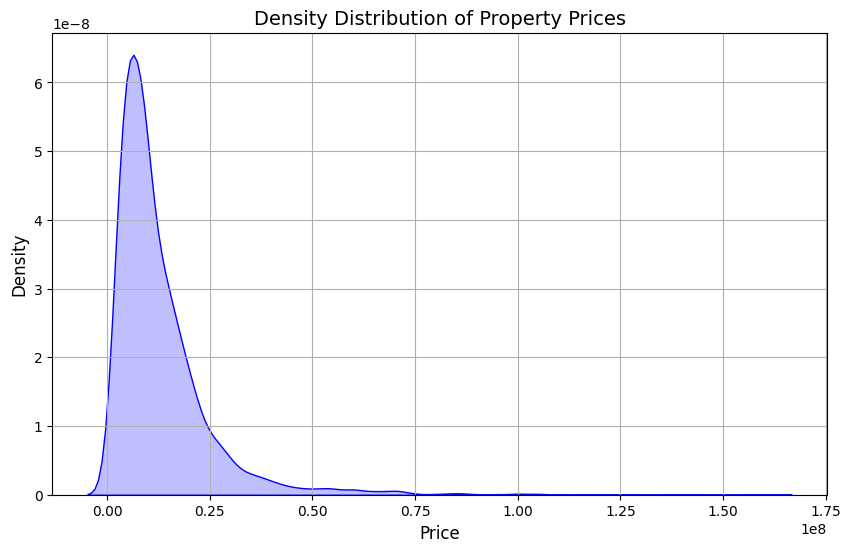

In [4]:
print("Before removing missing values:", df.shape)
df = df.dropna()
print("After removing missing values:", df.shape)
df['Location'] = df['Location'].str.lower().str.strip()

def remove_price_outliers(data):
    df_out = pd.DataFrame()
    for key, subdf in data.groupby('Location'):
        m = np.mean(subdf['Price'])
        st = np.std(subdf['Price'])
        reduced_df = subdf[(subdf['Price'] > (m - st)) & (subdf['Price'] < (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df_cleaned = remove_price_outliers(df)

df_cleaned['price_per_sqft'] = df_cleaned['Price'] / df_cleaned['Area']

median_price_per_location = df_cleaned.groupby('Location')['price_per_sqft'].median()
df_cleaned['location_encoded'] = df_cleaned['Location'].map(median_price_per_location)

print("Before removing outliers:", df.shape)
print("After removing outliers:", df_cleaned.shape)

plt.figure(figsize=(10, 6))
sns.kdeplot(df_cleaned['Price'], fill=True, color='blue')
plt.title('Density Distribution of Property Prices', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True)
plt.show()

In [5]:
df.dropna(inplace=True)

# Changing Nominal Attribute

             Location  price_per_sqft  location_encoded
0            kharghar     6736.111111       8670.520231
1            kharghar     7500.000000       8670.520231
2            kharghar    10307.692308       8670.520231
3            kharghar     6923.076923       8670.520231
4            kharghar     7518.796992       8670.520231
5            kharghar     8500.000000       8670.520231
6            kharghar     8064.516129       8670.520231
7  sector-13 kharghar     7664.233577       7664.233577
8            kharghar     7743.362832       8670.520231
9            kharghar     8928.571429       8670.520231


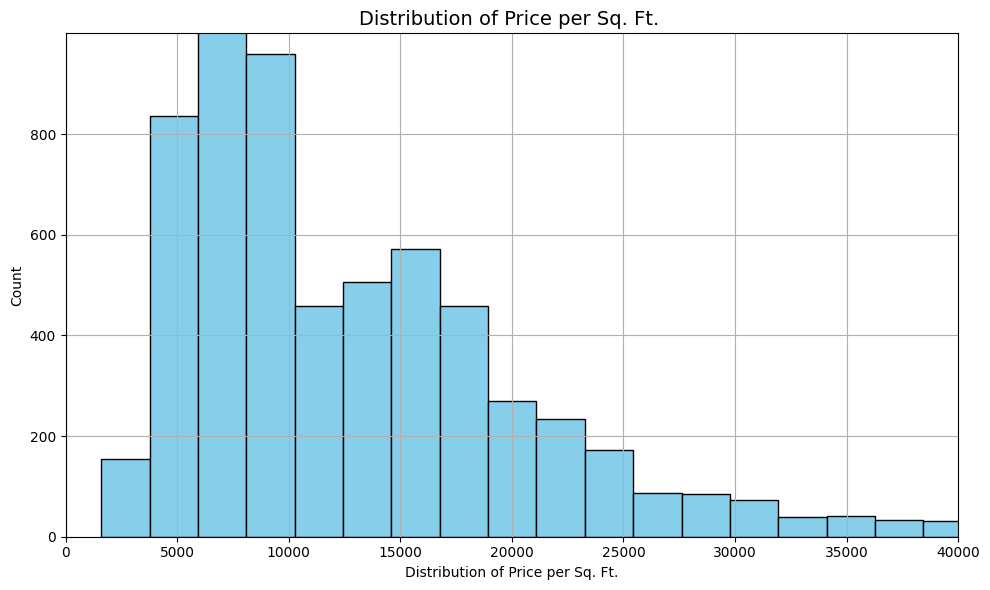

In [6]:
df['price_per_sqft'] = df['Price'] / df['Area']
median_price_per_location = df.groupby('Location')['price_per_sqft'].median()
df['location_encoded'] = df['Location'].map(median_price_per_location)
print(df[['Location', 'price_per_sqft', 'location_encoded']].head(10))


plt.figure(figsize=(10, 6))
plt.hist(df['price_per_sqft'], bins=50, color='skyblue', edgecolor='black')

df = df[(df['price_per_sqft'] > df['price_per_sqft'].quantile(0.05)) &
        (df['price_per_sqft'] < df['price_per_sqft'].quantile(0.95))]
plt.title('Distribution of Price per Sq. Ft. ', fontsize=14)
plt.xlim(0, 40000)
plt.xticks([0, 5000, 10000, 15000, 20000,25000,30000,35000,40000])
plt.ylim(0, 1000)
plt.yticks([0, 200, 400, 600, 800])
plt.ylabel("Count")
plt.xlabel("Distribution of Price per Sq. Ft.")
plt.grid(True)
plt.tight_layout()
plt.show()

# Heat Map depicting correlation among all variables

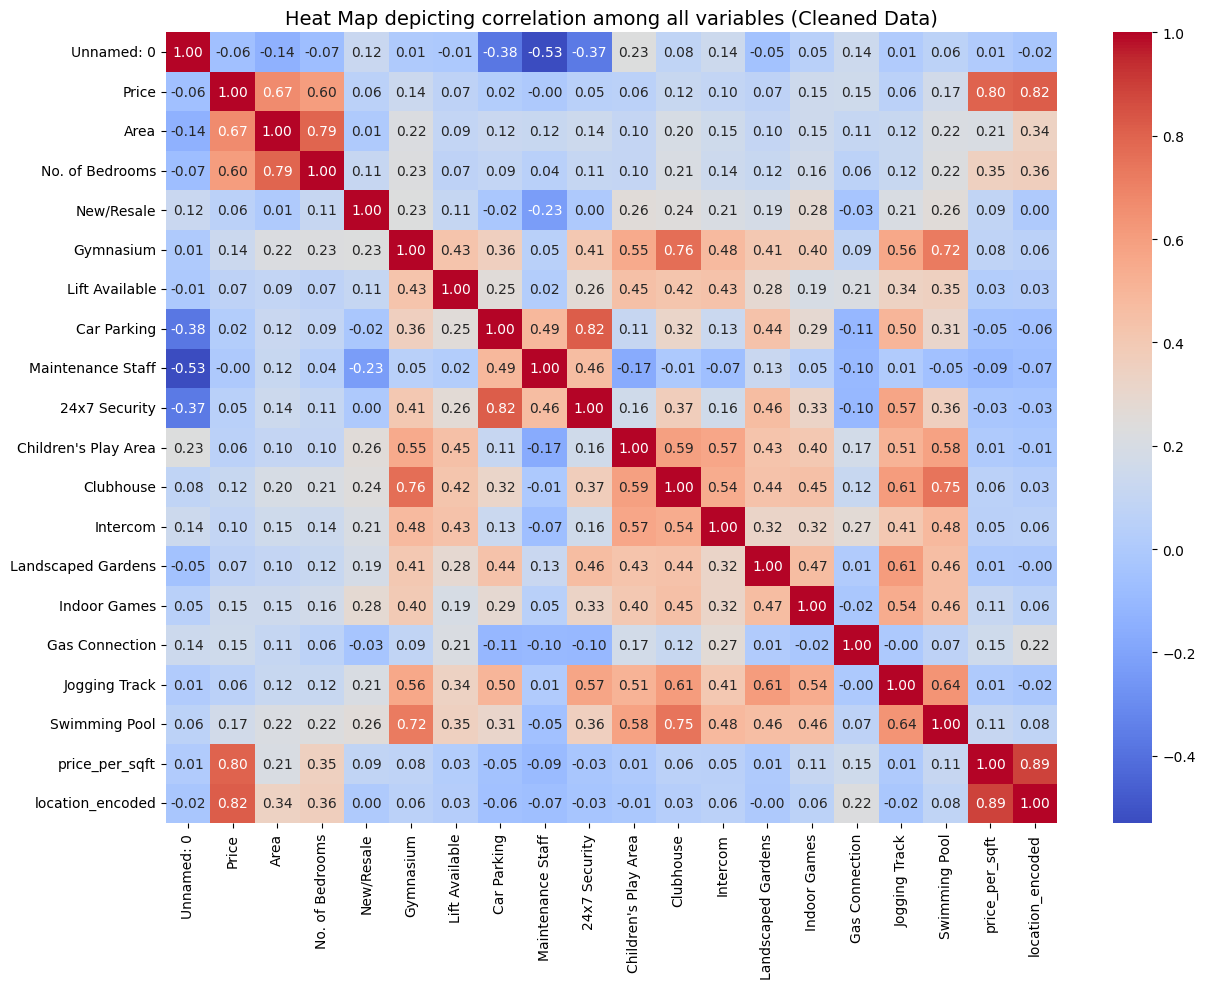

In [7]:
df_corr = df_cleaned.drop(['Location'], axis=1)
plt.figure(figsize=(13, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat Map depicting correlation among all variables (Cleaned Data)', fontsize=14)
plt.tight_layout()
plt.show()

# Model Training (Linear Regression)

In [8]:

features = [
    'Area', 'New/Resale', 'Car Parking', 'No. of Bedrooms', 'Gymnasium', 'Lift Available',
    'Maintenance Staff', '24x7 Security', 'Children\'s Play Area', 'Clubhouse', 'Intercom',
    'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
    'price_per_sqft'
]

# Define X (features) and y (target)
X = df_cleaned[features]
y = df_cleaned['Price']

# Split dataset: 67% training, 33% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Create coefficient table as per paper format
coefficients = pd.DataFrame({
    'Attribute': features,
    'Coefficient': model.coef_
})

# Format for scientific notation (like the paper)
pd.options.display.float_format = '{:.6e}'.format

print("\n📋 Table I: Coefficients of All the Attributes (As per the Paper)")
print(coefficients.to_string(index=False))



📋 Table I: Coefficients of All the Attributes (As per the Paper)
           Attribute   Coefficient
                Area  2.151015e+04
          New/Resale  1.792928e+05
         Car Parking -2.050528e+04
     No. of Bedrooms -3.049903e+06
           Gymnasium -1.103018e+06
      Lift Available  6.694294e+05
   Maintenance Staff -2.248009e+05
       24x7 Security -4.422382e+04
Children's Play Area  3.440086e+05
           Clubhouse  1.449727e+05
            Intercom -6.123060e+05
  Landscaped Gardens  9.517146e+05
        Indoor Games -3.367416e+04
      Gas Connection -4.790819e+05
       Jogging Track -7.963454e+04
       Swimming Pool -1.404414e+05
      price_per_sqft  1.062875e+03


# Model training (Gradient Descent )

In [9]:
df_cleaned['price_per_sqft'] = df_cleaned['Price'] / df_cleaned['Area']

median_price_per_location = df_cleaned.groupby('Location')['price_per_sqft'].median()
df_cleaned['location_encoded'] = df_cleaned['Location'].map(median_price_per_location)


features = [
    'Area', 'No. of Bedrooms', 'New/Resale', 'Car Parking', 'Gymnasium', 'Lift Available',
    'Maintenance Staff', '24x7 Security', 'Children\'s Play Area', 'Clubhouse', 'Intercom',
    'Landscaped Gardens', 'Indoor Games', 'Gas Connection', 'Jogging Track', 'Swimming Pool',
    'price_per_sqft', 'location_encoded'
]

X = df_cleaned[features].values
y = df_cleaned['Price'].values.reshape(-1,1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_b = np.c_[np.ones((X_train_scaled.shape[0],1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0],1)), X_test_scaled]

theta = np.zeros((X_train_b.shape[1],1))


learning_rate = 0.01
n_iterations = 1000
m = len(y_train)


for iteration in range(n_iterations):
    gradients = (2/m) * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
    theta = theta - learning_rate * gradients


coef_names = ['Intercept'] + features
coefficients = pd.DataFrame({'Feature': coef_names, 'Coefficient': theta.flatten()})
print("\nModel Coefficients:")
print(coefficients)


Model Coefficients:
                 Feature   Coefficient
0              Intercept  1.289754e+07
1                   Area  7.617698e+06
2        No. of Bedrooms -1.596357e+06
3             New/Resale  1.763009e+05
4            Car Parking  4.370693e+03
5              Gymnasium -5.394532e+05
6         Lift Available  2.885651e+05
7      Maintenance Staff -2.594863e+04
8          24x7 Security -2.203485e+04
9   Children's Play Area  2.039047e+05
10             Clubhouse  7.520607e+04
11              Intercom -3.251459e+05
12    Landscaped Gardens  3.459864e+05
13          Indoor Games  7.821360e+04
14        Gas Connection -3.060815e+05
15         Jogging Track -1.142348e+04
16         Swimming Pool -2.716948e+04
17        price_per_sqft  7.066140e+06
18      location_encoded  1.986353e+06


# Testing the accuracy using Linear Regression with Scatterplot

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


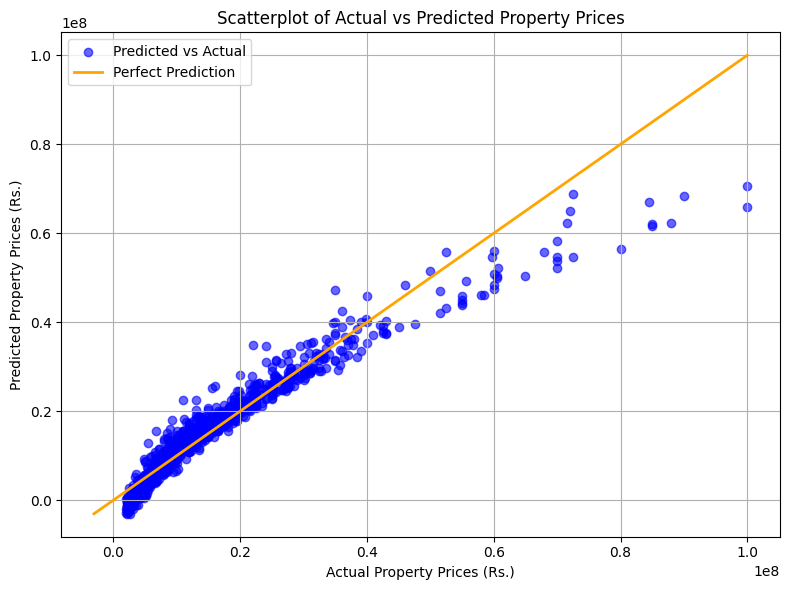

In [18]:
np.random.seed(0)
X = 2.5 * np.random.randn(100, 1) + 1.5
y = 200000 + (X.flatten() * 50000) + (np.random.randn(100) * 25000)

# Calculate y_pred using the trained linear regression model
y_pred = model.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')

min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())
plt.plot([min_price, max_price], [min_price, max_price], color='orange', lw=2, label='Perfect Prediction')

plt.title('Scatterplot of Actual vs Predicted Property Prices')
plt.xlabel('Actual Property Prices (Rs.)')
plt.ylabel('Predicted Property Prices (Rs.)')

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Testing Accuracy Using Gradient Descent with Scatterplot

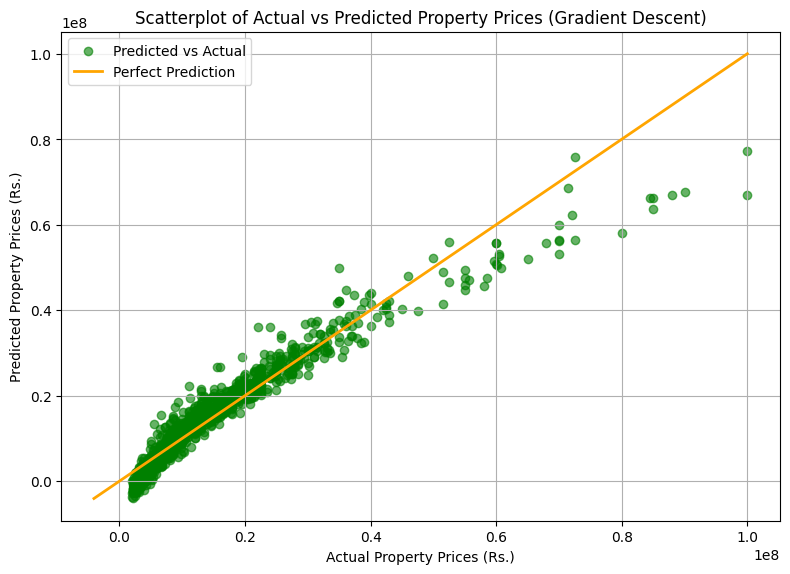

In [13]:
# Calculate y_pred using the trained Gradient Descent model (theta)
y_pred = X_test_b.dot(theta)

min_price = min(y_test.min(), y_pred.min())
max_price = max(y_test.max(), y_pred.max())

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='green', label='Predicted vs Actual')
plt.plot([min_price, max_price], [min_price, max_price], color='orange', lw=2, label='Perfect Prediction')
plt.title('Scatterplot of Actual vs Predicted Property Prices (Gradient Descent)')
plt.xlabel('Actual Property Prices (Rs.)')
plt.ylabel('Predicted Property Prices (Rs.)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression-Result-Coefficient of Determination(R²)


In [16]:
X = df[features]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
explained = r2 * 100
unexplained = (1 - r2) * 100
print(f"For our Linear Regression, the R²-score is {r2:.4f}.\n"
      f"It can be perceived here that {explained:.2f}% of the variance of the dependent attribute/variable"
      f"can be elucidated by our selected model, while the remaining {unexplained:.2f}%\n"
      f"of the changeability is yet to be accounted for.")

For our Linear Regression, the R²-score is 0.8994.
It can be perceived here that 89.94% of the variance of the dependent attribute/variablecan be elucidated by our selected model, while the remaining 10.06%
of the changeability is yet to be accounted for.


# Gradient Descent-Result-Coefficient of Determination(R²)

In [17]:
X = df_cleaned[features].values
y = df_cleaned['Price'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_b = np.c_[np.ones((X_train_scaled.shape[0],1)), X_train_scaled]  # train set
X_test_b = np.c_[np.ones((X_test_scaled.shape[0],1)), X_test_scaled]     # test set


y_pred = X_test_b.dot(theta)


r2 = r2_score(y_test, y_pred)
explained = r2 * 100
unexplained = (1 - r2) * 100

print(f"For our Gradient Descent Linear Regression, the R²-score is {r2:.4f}.\n"
      f"It means that {explained:.2f}% of the variance of the dependent variable"
      f"is explained by the model, while the remaining {unexplained:.2f}%\n"
      f"is unexplained (due to noise or other factors).")

For our Gradient Descent Linear Regression, the R²-score is 0.9242.
It means that 92.42% of the variance of the dependent variableis explained by the model, while the remaining 7.58%
is unexplained (due to noise or other factors).
